In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [64]:
# import data
data = pd.read_excel("DATA STATPEM.xlsx")
data

,Provinsi,Garis Kemiskinan,Upah Per Jam,TPT
0,ACEH,634889.5,17585,5.890
1,SUMATERA UTARA,600141.0,17609,5.565
2,SUMATERA BARAT,667612.0,16694,5.920
3,RIAU,665472.5,18413,4.240
4,JAMBI,625921.5,17596,4.515
5,SUMATERA SELATAN,528395.0,16273,4.320
6,BENGKULU,654021.5,17410,3.315
7,LAMPUNG,572594.5,13958,4.205
8,KEP. BANGKA BELITUNG,876340.5,20141,4.225
9,KEP. RIAU,727713.0,27640,7.205


In [65]:
# deklarasi variabel fitur
feature = data[['Garis Kemiskinan', 'Upah Per Jam', 'TPT']]

In [66]:
# normalisasi fitur
scaler = MinMaxScaler()
normalized_feature = scaler.fit_transform(feature)

In [47]:
# mencari kluster optimal dengan elbow method
import matplotlib.pyplot as plt

sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(normalized_feature)
    sse.append(kmeans.inertia_)

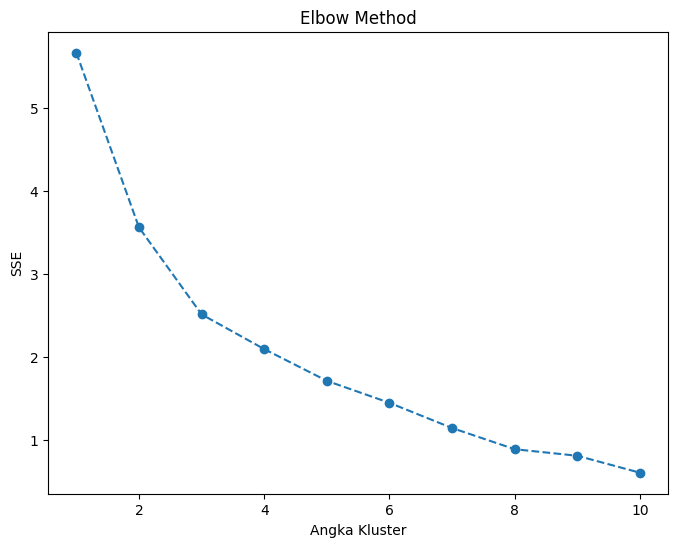

In [48]:
# visualisasi elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Angka Kluster')
plt.ylabel('SSE')
plt.show() 

Didapatkan jumlah kluster yang optimal adalah 3

In [49]:
# mencari kluster optimal dengan silhouette score
from sklearn.metrics import silhouette_score

# Mencari Silhouette Score untuk berbagai nilai k
silhouette_scores = []
for k in range(2, 11):  # Mulai dari 2 karena 1 tidak memiliki makna untuk silhouette
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_feature)
    score = silhouette_score(normalized_feature, kmeans.labels_)
    silhouette_scores.append(score)


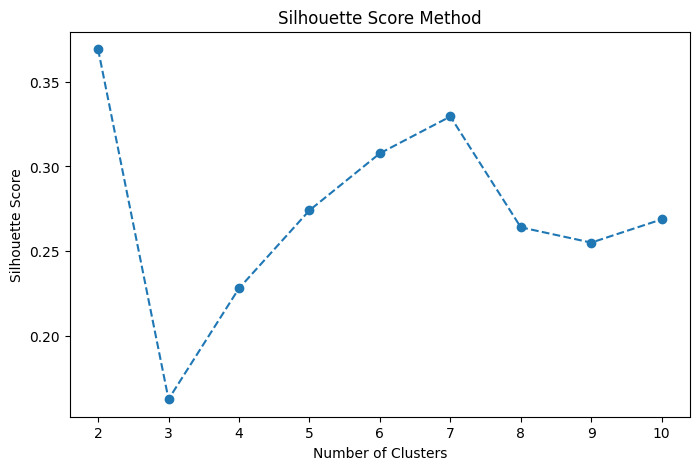

In [50]:
# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Dari silhoutte score didapatkan kluster yang optimal adalah 3

Dari elbow method dan silhoutte methode didapatkan jumlah kluster yang optimal adalah 3

In [67]:
# klusterisasi
kmeans = KMeans(n_clusters=3, random_state=42)
data['Kluster'] = kmeans.fit_predict(normalized_feature)

In [68]:
data

,Provinsi,Garis Kemiskinan,Upah Per Jam,TPT,Kluster
0,ACEH,634889.5,17585,5.890,2
1,SUMATERA UTARA,600141.0,17609,5.565,0
2,SUMATERA BARAT,667612.0,16694,5.920,2
3,RIAU,665472.5,18413,4.240,1
4,JAMBI,625921.5,17596,4.515,1
5,SUMATERA SELATAN,528395.0,16273,4.320,0
6,BENGKULU,654021.5,17410,3.315,1
7,LAMPUNG,572594.5,13958,4.205,1
8,KEP. BANGKA BELITUNG,876340.5,20141,4.225,1
9,KEP. RIAU,727713.0,27640,7.205,2


In [ ]:
# deskripsi kluster
deskripsi = pd.DataFrame(data.groupby('Kluster')[['Garis Kemiskinan', 'Upah Per Jam', 'TPT']].describe())
deskripsi

In [53]:
# menyimpan data
data.to_excel('hasil_kluster2.xlsx', index=False)

In [42]:
# menyimpan deskrpsi kluster
deskripsi.to_excel('deskripsi_kluster.xlsx')